# Context
These datasets contain information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED main dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles. The TED transcripts dataset contains the transcripts for all talks available on TED.com.

# Content (for the CSV files)

## TED Main Dataset
* name: The official name of the TED Talk. Includes the title and the speaker.
* title: The title of the talk
* description: A blurb of what the talk is about.
* main_speaker: The first named speaker of the talk.
* speaker_occupation: The occupation of the main speaker.
* num_speaker: The number of speakers in the talk.
* duration: The duration of the talk in seconds.
* event: The TED/TEDx event where the talk took place.
* film_date: The Unix timestamp of the filming.
* published_date: The Unix timestamp for the publication of the talk on TED.com
* comments: The number of first level comments made on the talk.
* tags: The themes associated with the talk.
* languages: The number of languages in which the talk is available.
* ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* related_talks: A list of dictionaries of recommended talks to watch next.
* url: The URL of the talk.
* views: The number of views on the talk. 

# Acknowledgements

The data has been scraped from the official TED Website and is available under the Creative Commons License.

# Inspiration

I've always been fascinated by TED Talks and the immense diversity of content that it provides for free. I was also thoroughly inspired by a TED Talk that visually explored TED Talks stats and I was motivated to do the same thing, albeit on a much less grander scale.

Some of the questions that can be answered with this dataset: 1. How is each TED Talk related to every other TED Talk? 2. Which are the most viewed and most favorited Talks of all time? Are they mostly the same? What does this tell us? 3. What kind of topics attract the maximum discussion and debate (in the form of comments)? 4. Which months are most popular among TED and TEDx chapters? 5. Which themes are most popular amongst TEDsters?

In [55]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('./Data/ted_main.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


The TED datasets have 2550 entries and 17 features.

In [58]:
df.shape

(2550, 17)

Reorder the columns

In [59]:
df = df[['name', 
         'title', 
         'description', 
         'main_speaker', 
         'speaker_occupation', 
         'num_speaker', 
         'duration', 
         'event', 
         'film_date', 
         'published_date', 
         'comments', 
         'tags', 
         'languages', 
         'ratings', 
         'related_talks', 
         'url', 
         'views']]
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


convert the Unix timestamps into a human readable format.

In [60]:
import datetime

# timestamp to readable time transfer function
def unix_data_to_normal(time_stamp):
    return datetime.datetime.fromtimestamp(time_stamp).strftime('%Y/%m/%d')
    
# transfer the film_date and published_date
df['film_date'] = df['film_date'].apply(unix_data_to_normal)
# df['film_date'] = df['film_date'].map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y/%m/%d'))

df['published_date'] = df['published_date'].apply(unix_data_to_normal)
# df['published_date'] = df['published_date'].map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y/%m/%d'))

df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006/02/24,2006/06/26,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006/02/24,2006/06/26,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,2006/02/23,2006/06/26,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,2006/02/25,2006/06/26,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,2006/02/21,2006/06/27,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Most popular 15 TED talks.

In [63]:
pop_ted = df[['title', 'main_speaker', 'duration','views', 'film_date']]
pop_ted = pop_ted.sort_values(by='views', ascending=False)[:15]
pop_ted

,title,main_speaker,duration,views,film_date
0,Do schools kill creativity?,Ken Robinson,1164,47227110,2006/02/24
1346,Your body language may shape who you are,Amy Cuddy,1262,43155405,2012/06/25
677,How great leaders inspire action,Simon Sinek,1084,34309432,2009/09/16
837,The power of vulnerability,Brené Brown,1219,31168150,2010/06/05
452,10 things you didn't know about orgasm,Mary Roach,1003,22270883,2009/02/05
1776,How to speak so that people want to listen,Julian Treasure,598,21594632,2013/06/09
201,My stroke of insight,Jill Bolte Taylor,1099,21190883,2008/02/26
5,Why we do what we do,Tony Robbins,1305,20685401,2006/02/01
2114,This is what happens when you reply to spam email,James Veitch,588,20475972,2015/12/07
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,577,19787465,2012/10/26


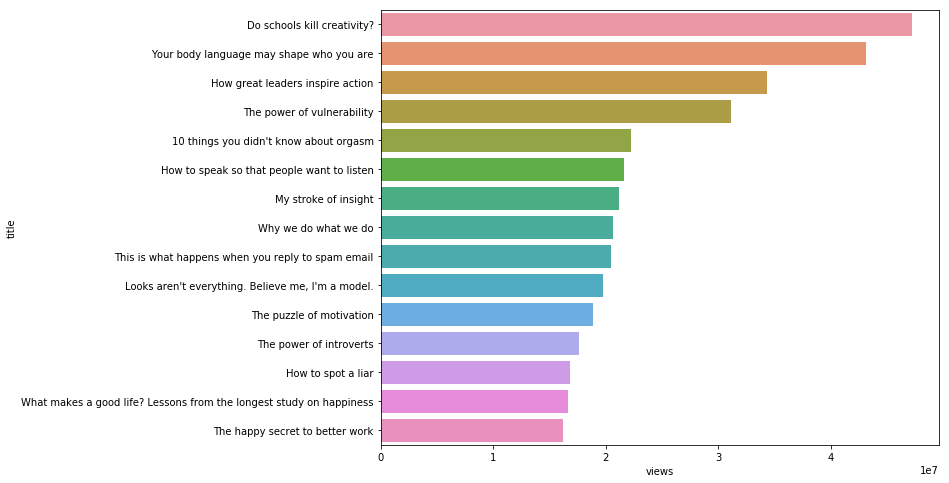

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x=pop_ted['views'], y=pop_ted['title']);

In [77]:
df[['views']].describe()

,views
count,2.550000e+03
mean,1.698297e+06
std,2.498479e+06
min,5.044300e+04
25%,7.557928e+05
50%,1.124524e+06
75%,1.700760e+06
max,4.722711e+07


# Most Popular 10 Speakers.

In [118]:
pop_speakers = df[['main_speaker', 'duration']]

pop_10_speakers = pd.DataFrame({
    'main_speaker': pop_speakers['main_speaker'].value_counts()[:10].index,
    'show_times': pop_speakers['main_speaker'].value_counts()[:10].values
})

def get_total_time(name):
    return sum(pop_speakers[(pop_speakers['main_speaker'] == name)]['duration'].values)

pop_10_speakers['total_duration'] = [get_total_time(name) for name in pop_10_speakers['main_speaker']]
pop_10_speakers

,main_speaker,show_times,total_duration
0,Hans Rosling,9,7968
1,Juan Enriquez,7,6759
2,Rives,6,2737
3,Marco Tempest,6,2180
4,Jacqueline Novogratz,5,4418
5,Julian Treasure,5,2439
6,Bill Gates,5,4637
7,Clay Shirky,5,4932
8,Dan Ariely,5,4123
9,Nicholas Negroponte,5,5171


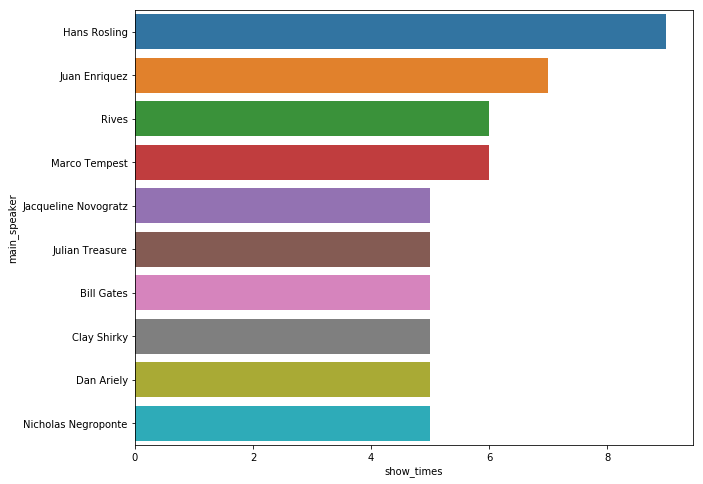

In [121]:
plt.figure(figsize=(10,8))
sns.barplot(x=pop_10_speakers['show_times'], y=pop_10_speakers['main_speaker']);

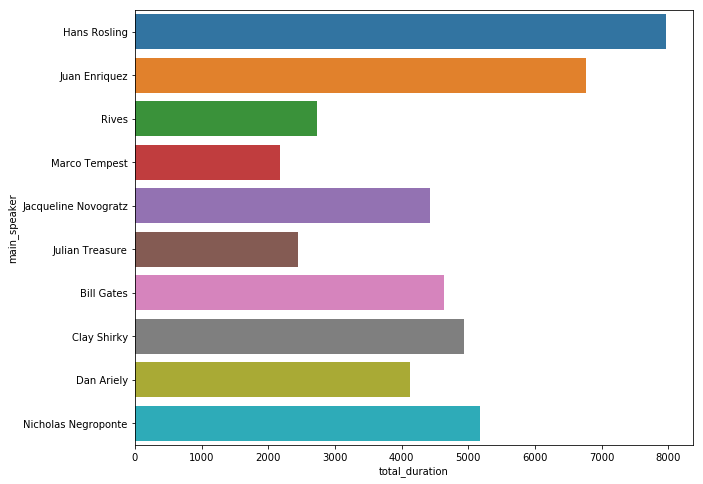

In [123]:
plt.figure(figsize=(10,8))
sns.barplot(x=pop_10_speakers['total_duration'], y=pop_10_speakers['main_speaker']);